In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("./train 2.csv")

In [3]:
df.head(5)

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [4]:
df.shape

(913000, 4)

In [5]:
df.isna().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [7]:
df["date"]=pd.to_datetime(df["date"])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   store   913000 non-null  int64         
 2   item    913000 non-null  int64         
 3   sales   913000 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 27.9 MB


In [9]:
df.drop("store",inplace=True,axis=1)

In [10]:
df2=df.groupby(["item",pd.Grouper(key="date",freq="3M")]).sum()

In [194]:
df2

sales
item date             
1    2013-01-31   3794
     2013-04-30  14836
     2013-07-31  20144
     2013-10-31  17682
     2014-01-31  14590
...                ...
50   2017-01-31  54815
     2017-04-30  60006
     2017-07-31  82341
     2017-10-31  71541
     2018-01-31  40571

[1050 rows x 1 columns]

In [13]:
df2.reset_index()

,item,date,sales
0,1,2013-01-31,3794
1,1,2013-04-30,14836
2,1,2013-07-31,20144
3,1,2013-10-31,17682
4,1,2014-01-31,14590
...,...,...,...
1045,50,2017-01-31,54815
1046,50,2017-04-30,60006
1047,50,2017-07-31,82341
1048,50,2017-10-31,71541


In [33]:
df2.index

MultiIndex([( 1, '2013-01-31'),
            ( 1, '2013-04-30'),
            ( 1, '2013-07-31'),
            ( 1, '2013-10-31'),
            ( 1, '2014-01-31'),
            ( 1, '2014-04-30'),
            ( 1, '2014-07-31'),
            ( 1, '2014-10-31'),
            ( 1, '2015-01-31'),
            ( 1, '2015-04-30'),
            ...
            (10, '2015-10-31'),
            (10, '2016-01-31'),
            (10, '2016-04-30'),
            (10, '2016-07-31'),
            (10, '2016-10-31'),
            (10, '2017-01-31'),
            (10, '2017-04-30'),
            (10, '2017-07-31'),
            (10, '2017-10-31'),
            (10, '2018-01-31')],
           names=['store', 'date'], length=210)

In [91]:
item1=df[df["item"]==1]

In [92]:
item1=item1.groupby(pd.Grouper(key="date",freq="3M")).sum()
# item1

<AxesSubplot:xlabel='date'>

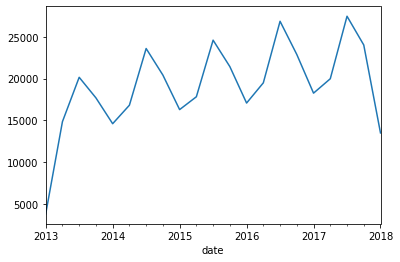

In [85]:
item1["sales"].plot()

<AxesSubplot:xlabel='date'>

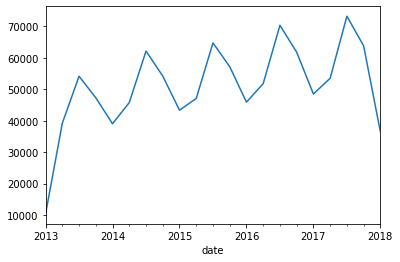

In [93]:
item2=df[df["item"]==2]
item2=item2.groupby(pd.Grouper(key="date",freq="3M")).sum()
item2["sales"].plot()

In [96]:
def item(num):
    item2=df[df["item"]==num]
    item2=item2.groupby(pd.Grouper(key="date",freq="3M")).sum()
    item2["sales"].plot()
#     plt.show()

(None, None, None)

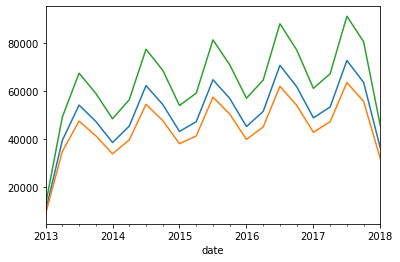

In [102]:
item(6),item(9),item(10)

In [109]:
from datetime import datetime

In [195]:
arr1=[]
arr2=[]
for i,j in df2.index:
    arr1.append(int(j.strftime("%m")))
    arr2.append(i)
#     print(int(j.strftime("%m")))
#     break
df2["month"]=arr1
df2["item"]=arr2

In [196]:
df2

sales  month  item
item date                          
1    2013-01-31   3794      1     1
     2013-04-30  14836      4     1
     2013-07-31  20144      7     1
     2013-10-31  17682     10     1
     2014-01-31  14590      1     1
...                ...    ...   ...
50   2017-01-31  54815      1    50
     2017-04-30  60006      4    50
     2017-07-31  82341      7    50
     2017-10-31  71541     10    50
     2018-01-31  40571      1    50

[1050 rows x 3 columns]

In [197]:
df2=df2.droplevel(level=1)

In [198]:
df2=df2.drop("item",axis=1)

In [199]:
df2=df2.reset_index()

In [200]:
df2

,item,sales,month
0,1,3794,1
1,1,14836,4
2,1,20144,7
3,1,17682,10
4,1,14590,1
...,...,...,...
1045,50,54815,1
1046,50,60006,4
1047,50,82341,7
1048,50,71541,10


In [201]:
df2["sales"]=df2["sales"].shift(periods=-1)

In [210]:
df2[df2["item"]==1]

,item,sales,month
0,1,14836.0,1
1,1,20144.0,4
2,1,17682.0,7
3,1,14590.0,10
4,1,16803.0,1
5,1,23588.0,4
6,1,20411.0,7
7,1,16278.0,10
8,1,17814.0,1
9,1,24588.0,4


In [204]:
df2=df2.dropna()

In [205]:
x=df2[["item","month"]]
y=df2["sales"]

In [206]:
y

0       14836.0
1       20144.0
2       17682.0
3       14590.0
4       16803.0
         ...   
1044    54815.0
1045    60006.0
1046    82341.0
1047    71541.0
1048    40571.0
Name: sales, Length: 1049, dtype: float64

In [159]:
from sklearn.tree import DecisionTreeRegressor
dr=DecisionTreeRegressor()

In [211]:
from sklearn.model_selection import train_test_split

In [212]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=22)

In [160]:
dr.fit(x,y)

DecisionTreeRegressor()

In [161]:
dr.score(x,y)

0.872277871918999

In [213]:
dr.fit(x_train,y_train)


DecisionTreeRegressor()

In [215]:
print(dr.score(x_train,y_train))
dr.score(x_test,y_test)

0.85895801263326


0.7296849860985587

In [209]:
dr.predict([[1,4]])

C:\Users\Hariharan.M\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([24524.])

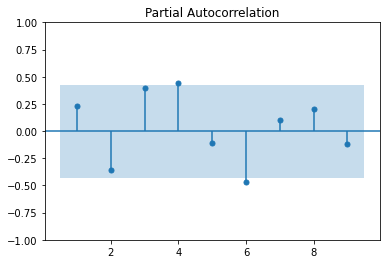

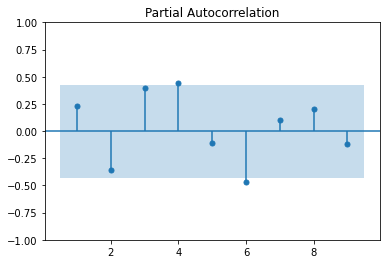

In [90]:
plot_pacf(item1["sales"],lags=9,zero=False)

In [59]:
df

,date,store,sales
0,2013-01-01,1,13
1,2013-01-02,1,11
2,2013-01-03,1,14
3,2013-01-04,1,13
4,2013-01-05,1,10
...,...,...,...
912995,2017-12-27,10,63
912996,2017-12-28,10,59
912997,2017-12-29,10,74
912998,2017-12-30,10,62


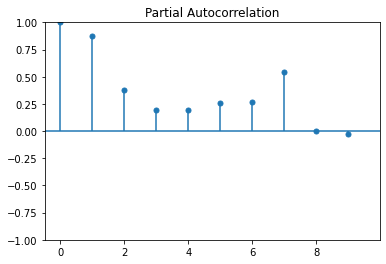

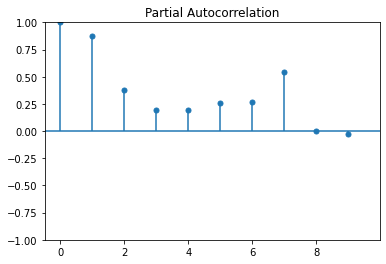

In [67]:
# from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df["sales"],lags=9)

<AxesSubplot:xlabel='date'>

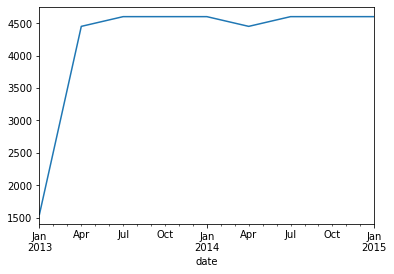

In [50]:
ss[:9]["sales"].plot()